In [1]:
# 1.Each news sources has moderately negative sentiment at the time of analysis.
# 2.The most negative and most positive tweets occurred within the last 20 tweets.
# 3.It would seem that a majority of each news sources tweets' were graded with neutral compound sentiment (0).

In [2]:
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
tweet_df = pd.DataFrame(columns = ["Source Account", "Tweet Text", "Date", "Tweets Ago", "Compound Sentiment", "Positive Sentiment", "Neutral Sentiment", "Negative Sentiment"])

In [5]:
target_user = ["BBCNews", "CBSNews", "CNN", "FoxNews", "nytimes"]
indexcount = 0
comp_avg = []

In [6]:
for user in target_user:
    public_tweets = api.user_timeline(user, count=100)
    tweetnumber = 0
    comp_list = []
    for tweet in public_tweets:
        search = tweet["text"]
        tweetdate = tweet["created_at"]
        compoundsent = analyzer.polarity_scores(search)["compound"]
        comp_list.append(analyzer.polarity_scores(search)["compound"])
        positivesent = analyzer.polarity_scores(search)["pos"]
        neutralsent = analyzer.polarity_scores(search)["neu"]
        negativesent = analyzer.polarity_scores(search)["neg"]
        tweet_df.set_value(indexcount, "Source Account", user)
        tweet_df.set_value(indexcount, "Tweet Text", search)
        tweet_df.set_value(indexcount, "Date", tweetdate)
        tweet_df.set_value(indexcount, "Tweets Ago", tweetnumber)
        tweet_df.set_value(indexcount, "Compound Sentiment", compoundsent)            
        tweet_df.set_value(indexcount, "Positive Sentiment", positivesent)
        tweet_df.set_value(indexcount, "Neutral Sentiment", neutralsent)
        tweet_df.set_value(indexcount, "Negative Sentiment", negativesent)
        indexcount = indexcount + 1
        tweetnumber = tweetnumber + 1
    comp_avg.append(np.mean(comp_list))

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:17: Futur

In [7]:
comp_avg


[-0.132012, -0.113847, 0.0036819999999999947, 0.029291, -0.03533699999999998]

In [8]:
tweet_df

,Source Account,Tweet Text,Date,Tweets Ago,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,BBCNews,RT @BBCSport: Ex-Middlesex and England wicketk...,Wed Jul 25 15:02:44 +0000 2018,0,-0.5574,0,0.833,0.167
1,BBCNews,RT @BBCSport: Current situation... 👀\n\n#tourd...,Wed Jul 25 14:39:59 +0000 2018,1,0,0,1,0
2,BBCNews,Lost wedding ring found on cricket pitch 52 ye...,Wed Jul 25 14:36:04 +0000 2018,2,-0.3182,0,0.813,0.187
3,BBCNews,Liquid water 'lake' revealed on Mars https://t...,Wed Jul 25 14:06:49 +0000 2018,3,0,0,1,0
4,BBCNews,Kylie Jenner and David Beckham make Instagram ...,Wed Jul 25 13:58:23 +0000 2018,4,0.5574,0.286,0.714,0
5,BBCNews,Badger cub rescued after 90ft Cornwall cliff p...,Wed Jul 25 13:07:23 +0000 2018,5,0.4215,0.259,0.741,0
6,BBCNews,RT @BBCBusiness: Just under an hour to go unti...,Wed Jul 25 12:15:48 +0000 2018,6,0,0,1,0
7,BBCNews,RT @BBC_HaveYourSay: Remember the 1976 heatwav...,Wed Jul 25 11:59:23 +0000 2018,7,0.6369,0.178,0.822,0
8,BBCNews,Demi Lovato: Suspected overdose follows long b...,Wed Jul 25 11:35:09 +0000 2018,8,-0.5423,0,0.667,0.333
9,BBCNews,RT @bbckamal: Saving - and why we're not doing...,Wed Jul 25 11:31:36 +0000 2018,9,0,0,1,0


In [9]:

#export to csv for final file#export 
tweet_df.to_csv("newstweets")

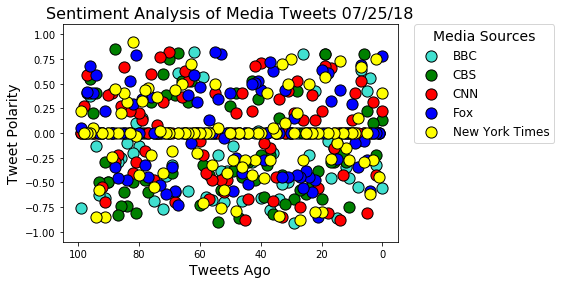

In [10]:
x_axis = (100, 0, 1)
bbcplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "BBCNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "BBCNews"]["Compound Sentiment"], marker="o", c="turquoise", edgecolors="black", linewidth=1 ,s=125, alpha=1, label="BBC")
cbsplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "CBSNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "CBSNews"]["Compound Sentiment"], marker="o", facecolors="green", edgecolors="black", linewidth=1, s=125, alpha=1, label="CBS")
cnnplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "CNN"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "CNN"]["Compound Sentiment"], marker="o", facecolors="red", edgecolors="black", linewidth=1,s=125, alpha=1, label="CNN")
foxplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "FoxNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "FoxNews"]["Compound Sentiment"], marker="o", facecolors="blue", edgecolors="black", linewidth=1,s=125, alpha=1, label="Fox")
nytplot = plt.scatter(tweet_df[tweet_df["Source Account"] == "nytimes"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "nytimes"]["Compound Sentiment"], marker="o", facecolors="yellow", edgecolors="black", linewidth=1,s=125, alpha=1, label="New York Times")
leg = plt.legend(title="Media Sources",fontsize=12, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.setp(leg.get_title(),fontsize=14)
bbox_inches="tight"
plt.title("Sentiment Analysis of Media Tweets " + str(time.strftime("%x")), fontsize=16)
plt.xlabel("Tweets Ago", fontsize=14)
plt.ylabel("Tweet Polarity", fontsize=14)
plt.ylim(-1.1, 1.1)
plt.xlim(105, -5)
plt.savefig("scatter_analysis.png")
plt.show()


In [11]:
#tweet_df.groupby('Source Account')["Compound Sentiment"].mean()
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
Source Account        500 non-null object
Tweet Text            500 non-null object
Date                  500 non-null object
Tweets Ago            500 non-null object
Compound Sentiment    500 non-null object
Positive Sentiment    500 non-null object
Neutral Sentiment     500 non-null object
Negative Sentiment    500 non-null object
dtypes: object(8)
memory usage: 55.2+ KB


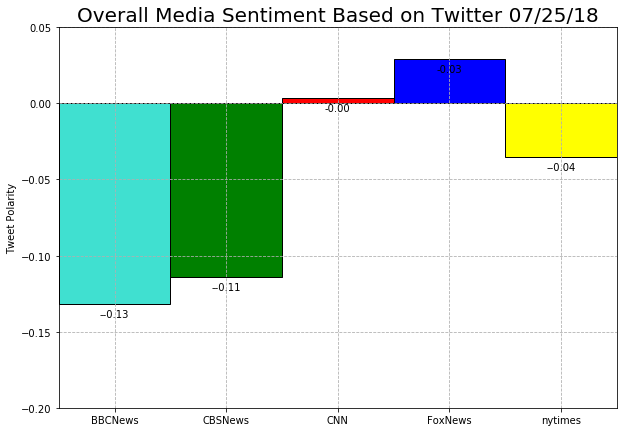

In [12]:
plt.figure(figsize=(10,7))
x_axis2 = np.arange(len(target_user))

rect1 = plt.bar(0, comp_avg[0], color='turquoise', alpha=1, align="edge", ec="black", width=1)
rect2 = plt.bar(1, comp_avg[1], color='green', alpha=1, align="edge", ec="black", width=1)
rect3 = plt.bar(2, comp_avg[2], color='red', alpha=1, align="edge", ec="black", width=1)
rect4 = plt.bar(3, comp_avg[3], color='blue', alpha=1, align="edge", ec="black", width=1)
rect5 = plt.bar(4, comp_avg[4], color='yellow', alpha=1, align="edge", ec="black", width=1)

tick_locations = [value+0.5 for value in x_axis2]
plt.grid(linestyle="dashed")
plt.xticks(tick_locations, target_user)
plt.xlim(0, 5)
plt.ylim(-.2, .05)

plt.title("Overall Media Sentiment Based on Twitter " + str(time.strftime("%x")), fontsize=20)
plt.ylabel("Tweet Polarity")

def label_negative(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., (height)-0.01,
                '-%.2f' % float(height),
                ha='center', va='bottom')


label_negative(rect1)
label_negative(rect2)
label_negative(rect3)
label_negative(rect4)
label_negative(rect5)

plt.savefig("bar_analysis.png")

plt.show()